In [1]:
%matplotlib notebook
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:496: FutureWa

In [2]:
dataset = pd.read_csv('C:/Users/lenovo/python_code/london_merged.csv')
dataset.head(22)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015/1/4 0:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015/1/4 1:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015/1/4 2:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015/1/4 3:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015/1/4 4:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015/1/4 5:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015/1/4 6:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015/1/4 7:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015/1/4 8:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015/1/4 9:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [3]:
print(dataset.describe())

                cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911  
min        1.000000      0.00000

In [4]:
df = dataset.iloc[:,1:10]
df = np.array(df)
print(df)

[[182.    3.    2.  ...   0.    1.    3. ]
 [138.    3.    2.5 ...   0.    1.    3. ]
 [134.    2.5   2.5 ...   0.    1.    3. ]
 ...
 [337.    5.5   1.5 ...   0.    0.    3. ]
 [224.    5.5   1.5 ...   0.    0.    3. ]
 [139.    5.    1.  ...   0.    0.    3. ]]


In [5]:
for i in range(9):
    df[:,i] = df[:,i]/(df[:,i].max()-df[:,i].min())

In [6]:
x_data = df[:,1:10]
x_data

array([[0.08450704, 0.05      , 1.16981132, ..., 0.        , 1.        ,
        1.        ],
       [0.08450704, 0.0625    , 1.16981132, ..., 0.        , 1.        ,
        1.        ],
       [0.07042254, 0.0625    , 1.21383648, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.15492958, 0.0375    , 0.98742138, ..., 0.        , 0.        ,
        1.        ],
       [0.15492958, 0.0375    , 0.95597484, ..., 0.        , 0.        ,
        1.        ],
       [0.14084507, 0.025     , 0.95597484, ..., 0.        , 0.        ,
        1.        ]])

In [7]:
y_data = df[:,0]
y_data

array([0.02315522, 0.01755725, 0.01704835, ..., 0.04287532, 0.02849873,
       0.01768448])

In [8]:
x = tf.placeholder(tf.float32,[None,8],name ="x")
y = tf.placeholder(tf.float32,[None,1],name ="y")

In [9]:
with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([8,1],stddev = 0.01),name = "w")
    b = tf.Variable(1.0,name="b")
    
    def model(x,w,b):
        return tf.matmul(x,w)+b
    pred = model(x,w,b)

In [10]:
train_epochs = 30
learning_rate = 0.01

In [11]:
with tf.name_scope("LossFunction"):
    LossFunction = tf.reduce_mean(tf.pow(y-pred,2))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(LossFunction)

In [13]:
sess = tf.Session()
init = tf.global_variables_initializer()

In [14]:
logdir = "e:/log"
sum_loss_op = tf.summary.scalar("loss",LossFunction)
merged = tf.summary.merge_all()

In [15]:
sess.run(init)
writer = tf.summary.FileWriter(logdir,sess.graph)

In [16]:
#save loss
loss_list = []

for epoch in range(train_epochs):
    loss_sum = 0
    for xs,ys in zip(x_data,y_data):
        xs =xs.reshape(1,8)
        ys = ys.reshape(1,1)
        _,summary_str,loss = sess.run([optimizer,sum_loss_op,LossFunction],feed_dict = {x:xs,y:ys})
        writer.add_summary(summary_str,epoch)
        loss_sum+=loss
        
    xvalue,yvalues = shuffle(x_data,y_data)
    #disturb numbet sequence
    bOtemp = b.eval(session = sess)
    wOtemp = w.eval(session = sess)
    loss_average = loss_sum/len(y_data)
    
    loss_list.append(loss_average)
    print("epoch=",epoch+1,"loss=",loss_average,"b=",bOtemp,"w=",wOtemp)

epoch= 1 loss= 0.014116937471964111 b= 0.5357442 w= [[ 0.13056919]
 [ 0.14542066]
 [-0.27898684]
 [ 0.04666435]
 [-0.02104811]
 [-0.02500565]
 [-0.02654457]
 [-0.17872067]]
epoch= 2 loss= 0.013405862434972845 b= 0.4123745 w= [[ 0.1737297 ]
 [ 0.17267957]
 [-0.24746649]
 [ 0.06001426]
 [-0.04265889]
 [-0.01994742]
 [-0.02550455]
 [-0.09548293]]
epoch= 3 loss= 0.013298634316079248 b= 0.33984932 w= [[ 0.19693747]
 [ 0.17249124]
 [-0.23919207]
 [ 0.06632237]
 [-0.05466425]
 [-0.01826515]
 [-0.02525494]
 [-0.03514884]]
epoch= 4 loss= 0.013259097291038944 b= 0.29722214 w= [[ 0.21364439]
 [ 0.16292922]
 [-0.23819986]
 [ 0.06886189]
 [-0.06015546]
 [-0.01778448]
 [-0.02530776]
 [ 0.00425967]]
epoch= 5 loss= 0.01324395406796468 b= 0.2720217 w= [[ 0.22822085]
 [ 0.15043841]
 [-0.23898333]
 [ 0.06960807]
 [-0.06266738]
 [-0.01768606]
 [-0.02543687]
 [ 0.02865944]]
epoch= 6 loss= 0.013237511151282678 b= 0.25691032 w= [[ 0.24203186]
 [ 0.1373671 ]
 [-0.23982498]
 [ 0.0695321 ]
 [-0.06389598]
 [-0.0

<IPython.core.display.Javascript object>


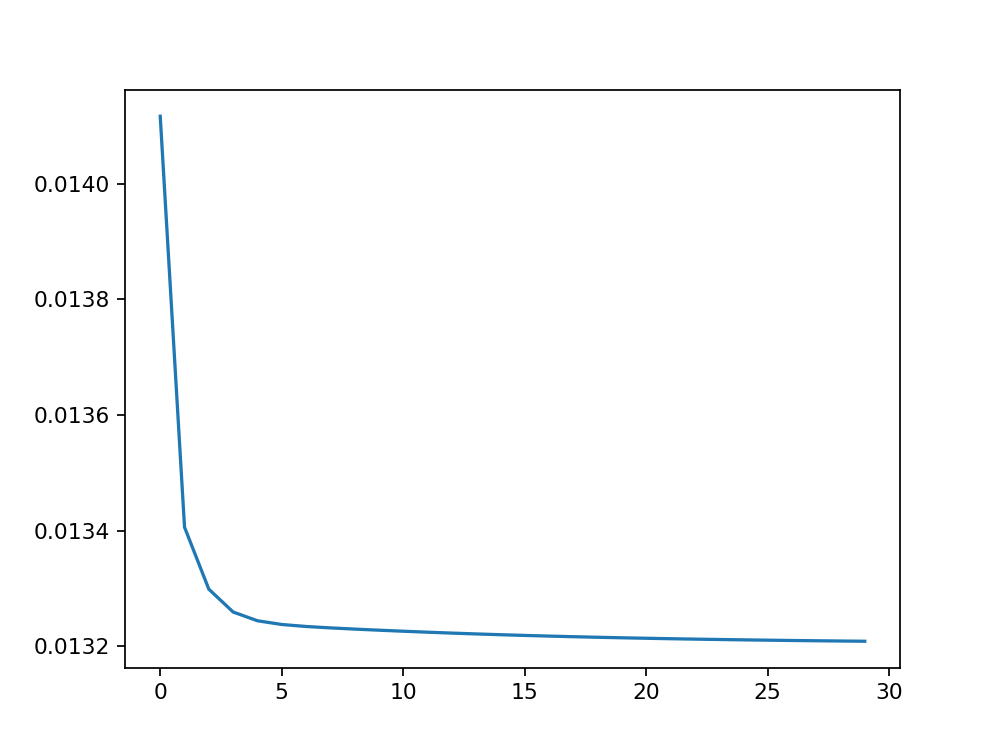

In [17]:
plt.plot(loss_list)

In [18]:
n = 100
for i in range(n):
    x_test = x_data[i]
    x_test = x_test.reshape(1,8)
    predict = sess.run(pred,feed_dict = {x:x_test})
    print("predict value:",predict)
    target = y_data[i]
    print("true value:",target)

predict value: [[0.00894068]]
true value: 0.023155216284987276
predict value: [[0.01273651]]
true value: 0.017557251908396947
predict value: [[-0.00900988]]
true value: 0.017048346055979643
predict value: [[-0.02498524]]
true value: 0.00916030534351145
predict value: [[0.00489368]]
true value: 0.0059796437659033076
predict value: [[-0.00034307]]
true value: 0.0058524173027989825
predict value: [[-0.03477834]]
true value: 0.0064885496183206106
predict value: [[-0.03477834]]
true value: 0.009541984732824428
predict value: [[-0.01711129]]
true value: 0.016666666666666666
predict value: [[-0.01793514]]
true value: 0.03829516539440204
predict value: [[0.01841868]]
true value: 0.06717557251908397
predict value: [[-0.01353197]]
true value: 0.09249363867684478
predict value: [[-0.00497447]]
true value: 0.10966921119592875
predict value: [[0.03910351]]
true value: 0.11653944020356234
predict value: [[0.01611437]]
true value: 0.1321882951653944
predict value: [[0.0060109]]
true value: 0.11055979